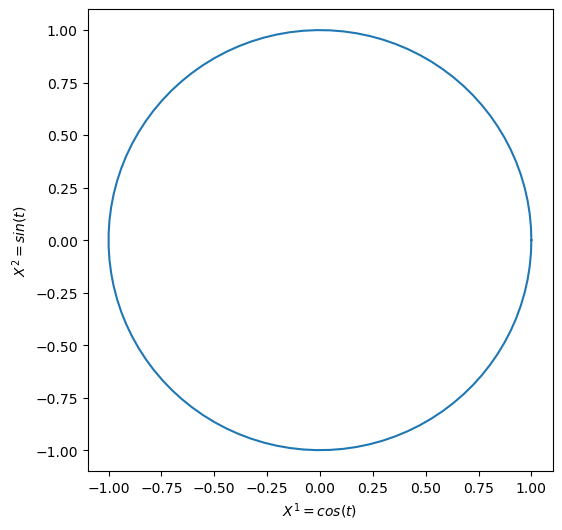

In [2]:
import matplotlib.pyplot as plt 
import numpy as np

X = [
    lambda t:np.cos(t),
    lambda t:np.sin(t),
]
t = np.linspace(0,2*np.pi,100)
fig,ax = plt.subplots(figsize=(6,6))
ax.set_xlabel("$X^1=cos(t)$")
ax.set_ylabel("$X^2=sin(t)$")
ax.plot(X[0](t),X[1](t))
plt.show()

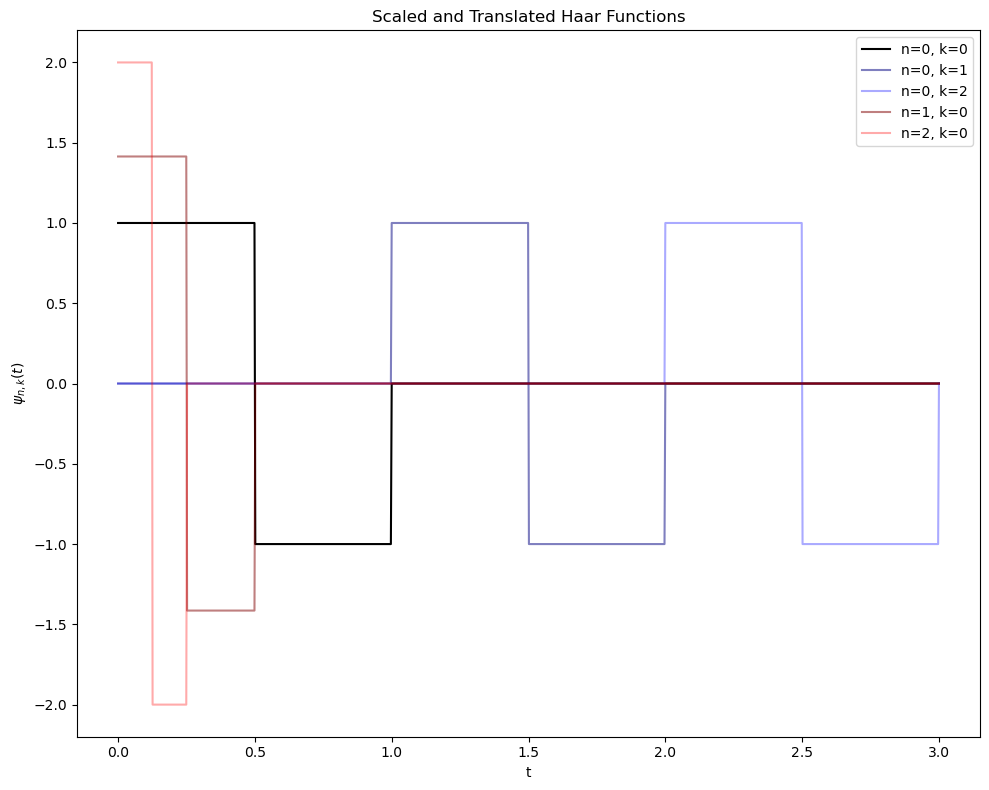

In [6]:
# Haar function
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd 

def haar_wavelet(t):
    result = np.zeros(len(t))
    result[(t >= 0) & (t < 1/2)] = 1
    result[(t >= 1/2) & (t<1)] = -1
    return result

def haar_scaled_translated(t, n, k):
    return 2**(n/2) * haar_wavelet(2**n * t - k)

ts = np.linspace(0, 3, 1000)

nks = [(0,0),(0,1),(0,2),(1,0),(2,0)]

def custom_colormap(n, k):
    red = n / 2.0
    blue = k / 2.0
    return (red, 0.0, blue)

# Create a plot
plt.figure(figsize=(10, 8))

# Plot the scaled and translated Haar functions
for (n, k) in nks:
    haar_st_values = haar_scaled_translated(ts, n, k)
    alpha = 1. / (n + k + 1) 
    linestyle = "-" if n+k == 0 else "--" if n+k == 1 else ":"
    plt.plot(ts, haar_st_values, label=f"n={n}, k={k}", color=custom_colormap(n, k),alpha=alpha, linestyle=linestyle)

# Annotate the plot
plt.title("Scaled and Translated Haar Functions")
plt.xlabel("t")
plt.ylabel("$\psi_{n,k}(t)$")
plt.legend()
plt.tight_layout()
plt.show()

cartesian line: 2.0*Piecewise((0, t < 0), (2.0*Min(0.5, t) - 1.0*Min(1, t), True)) for t over (-0.5, 2.5)
cartesian line: 2.0*Piecewise((0, t < 0), (-1.0*Min(1, t) + 2.0*Min(1.5, t) - 1.0*Min(2, t), True)) for t over (-0.5, 2.5)
cartesian line: 2.0*Piecewise((0, t < 0), (-1.0*Min(2, t) + 2.0*Min(2.5, t) - 1.0*Min(3, t), True)) for t over (-0.5, 2.5)
cartesian line: 2.82842712474619*Piecewise((0, t < 0), (2.82842712474619*Min(0.25, t) - 1.4142135623731*Min(1/2, t), True)) for t over (-0.5, 2.5)
cartesian line: 4.0*Piecewise((0, t < 0), (4.0*Min(0.125, t) - 2.0*Min(1/4, t), True)) for t over (-0.5, 2.5)


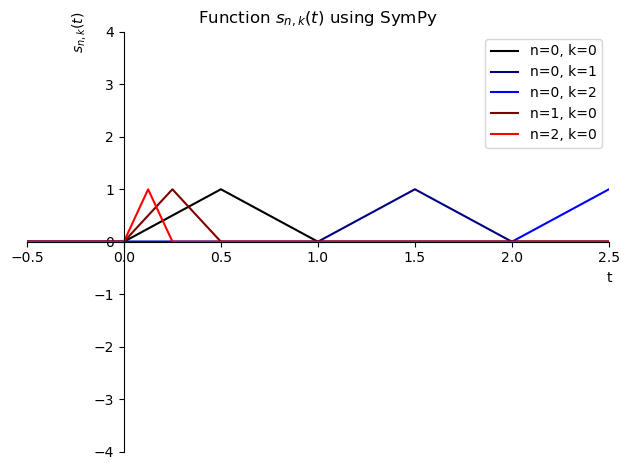

In [18]:
import sympy as sp

# Define symbolic variables
t, u = sp.symbols('t u')

# Define the Haar wavelet function symbolically
def haar_sym(u):
    return sp.Piecewise((1, (u >= 0) & (u < 0.5)), (-1, (u >= 0.5) & (u < 1)), (0, True))

# Define the scaled and translated Haar function
def haar_scaled_translated_sym(u, n, k):
    return 2**(n/2) * haar_sym(2**n * u - k)

# Define the s_nk function
def s_nk_sym(t, n, k):
    integrand = haar_scaled_translated_sym(u, n, k)
    return 2**(1 + n/2) * sp.integrate(integrand, (u, 0, t))

nk_values = [(0, 0), (0, 1), (0, 2), (1, 0), (2, 0)]

# Redefine the custom colormap
def custom_colormap(n, k):
    red = n / 2.0
    blue = k / 2.0
    return (red, 0, blue)

# Create a plot again
p = sp.plot(show=False, legend=True, xlim=(-0.5, 2.5), ylim=(-4, 4))

# Plot the functions for the specified n and k values
for (n, k) in nk_values:
    alpha = 1. / (n + k + 1) 
    linestyle = "-" if n+k == 0 else "--" if n+k == 1 else ":"
    p.extend(sp.plot(s_nk_sym(t, n, k), (t, -0.5, 2.5), line_color=custom_colormap(n, k), show=False, label=f"n={n}, k={k}", alpha=alpha, linestyle=linestyle))

p.title = "Function $s_{n,k}(t)$ using SymPy"
p.xlabel = "t"
p.ylabel = "$s_{n,k}(t)$"

for line in p:
    n, k = line.label.split(", ")
    n = int(n[-1])
    k = int(k[-1])
    if n + k == 1:
        line.line_style = "--"
        line.alpha = 0.5
    elif n + k == 2:
        line.line_style = ":"
        line.alpha = 0.25
    print(line)

p.show()
